In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv(r"C:\Users\shvpr\Documents\users_data.csv")

In [3]:
df.head()

,year,week,% active
0,2018,1,62.27%
1,2018,2,62.37%
2,2018,3,62.37%
3,2018,4,61.77%
4,2018,5,61.67%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      104 non-null    int64 
 1   week      104 non-null    int64 
 2   % active  104 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [5]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')
#df.drop('dT',axis=1,inplace=True)
df['% active'] = df['% active'].str.replace('%',"",regex=True)
df['% active'] = df['% active'].astype('float')

In [6]:
df.head()

,year,week,% active,date
0,2018,1,62.27,2018-01-08
1,2018,2,62.37,2018-01-15
2,2018,3,62.37,2018-01-22
3,2018,4,61.77,2018-01-29
4,2018,5,61.67,2018-02-05


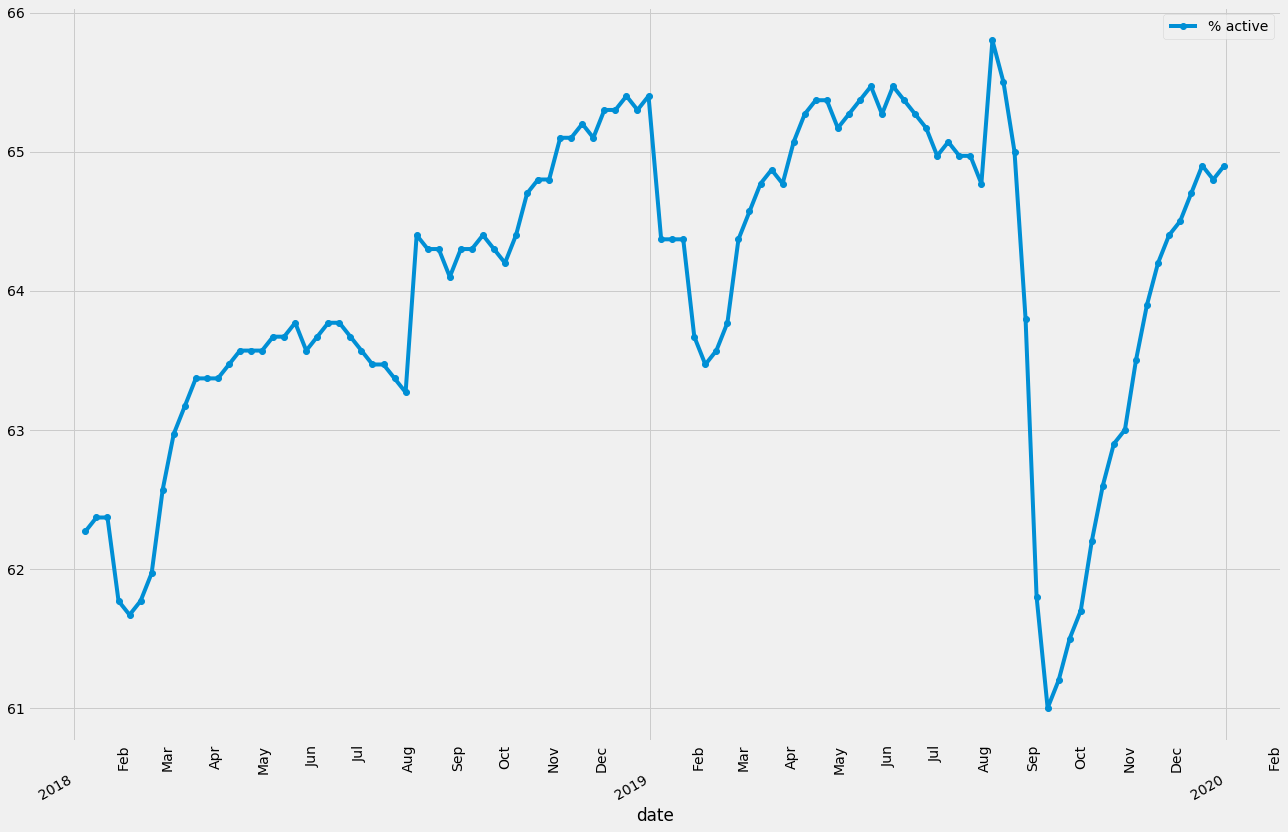

In [7]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,15))
df.plot(x='date', y='% active', marker='o', ax=ax)

# Format the x-ticks
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#myFmt = mdates.DateFormatter('%Y week %U')
#ax.xaxis.set_major_formatter(myFmt)
years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')  # add some space for the year label
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.show()

In [8]:
df = df.set_index('date')

In [9]:
time_df = df['% active']

In [10]:
time_df.head()

date
2018-01-08    62.27
2018-01-15    62.37
2018-01-22    62.37
2018-01-29    61.77
2018-02-05    61.67
Name: % active, dtype: float64

C:\Users\shvpr\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


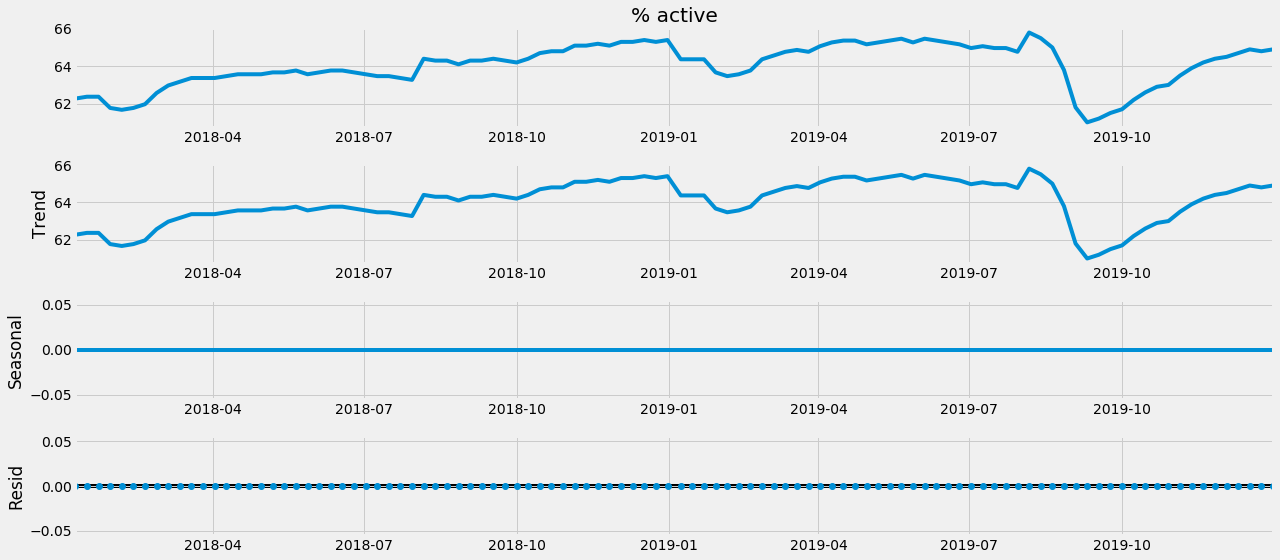

In [11]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = (18, 8)
y = time_df
decomposition = sm.tsa.seasonal_decompose(y, model='additive',freq=1)
fig = decomposition.plot()
plt.show()

C:\Users\shvpr\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


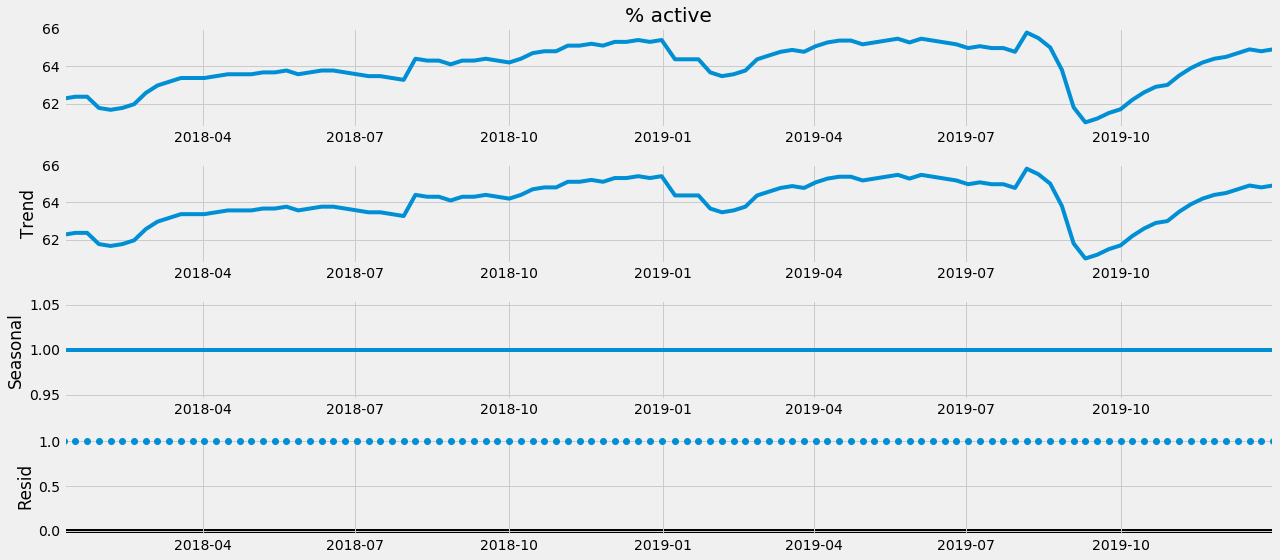

In [12]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = (18, 8)
y = time_df
result = sm.tsa.seasonal_decompose(y, model='multiplicative',freq=1)
fig = result.plot()
plt.show()

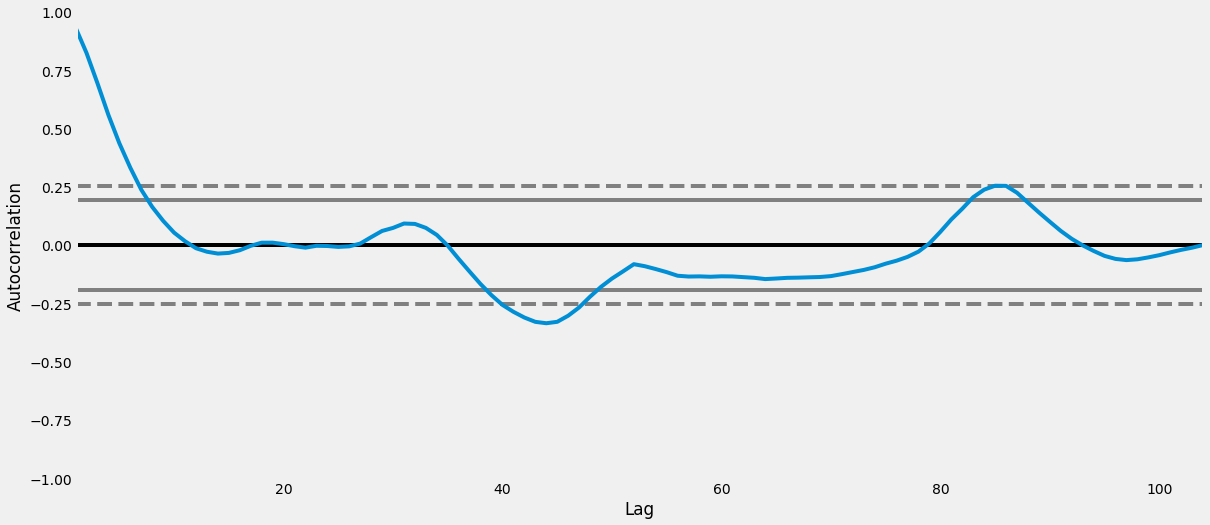

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)
plt.show()

In [14]:
print(decomposition.trend)


date
2018-01-08    62.27
2018-01-15    62.37
2018-01-22    62.37
2018-01-29    61.77
2018-02-05    61.67
              ...  
2019-12-03    64.50
2019-12-10    64.70
2019-12-17    64.90
2019-12-24    64.80
2019-12-31    64.90
Name: trend, Length: 104, dtype: float64


In [15]:
print(decomposition.seasonal)


date
2018-01-08    0.0
2018-01-15    0.0
2018-01-22    0.0
2018-01-29    0.0
2018-02-05    0.0
             ... 
2019-12-03    0.0
2019-12-10    0.0
2019-12-17    0.0
2019-12-24    0.0
2019-12-31    0.0
Name: seasonal, Length: 104, dtype: float64


In [16]:
print(decomposition.resid)


date
2018-01-08    0.0
2018-01-15    0.0
2018-01-22    0.0
2018-01-29    0.0
2018-02-05    0.0
             ... 
2019-12-03    0.0
2019-12-10    0.0
2019-12-17    0.0
2019-12-24    0.0
2019-12-31    0.0
Name: resid, Length: 104, dtype: float64


In [17]:
import itertools
p = d = q = (10,1,0)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(10, 10, 10), (10, 10, 1), (10, 10, 0), (10, 1, 10), (10, 1, 1), (10, 1, 0), (10, 0, 10), (10, 0, 1), (10, 0, 0), (1, 10, 10), (1, 10, 1), (1, 10, 0), (1, 1, 10), (1, 1, 1), (1, 1, 0), (1, 0, 10), (1, 0, 1), (1, 0, 0), (0, 10, 10), (0, 10, 1), (0, 10, 0), (0, 1, 10), (0, 1, 1), (0, 1, 0), (0, 0, 10), (0, 0, 1), (0, 0, 0)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (10, 10, 1) x (10, 10, 1, 7)
SARIMAX: (10, 10, 1) x (10, 10, 0, 7)
SARIMAX: (10, 10, 0) x (10, 1, 10, 7)
SARIMAX: (10, 10, 0) x (10, 1, 1, 7)


In [18]:
# import warnings
# warnings.filterwarnings('ignore')
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
#         except: 
#             continue

In [20]:
import warnings
warnings.filterwarnings('ignore')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(10, 1, 1),
                                seasonal_order=(0, 1, 10, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0569      0.505      2.094      0.036       0.067       2.046
ar.L2         -0.6233      0.583     -1.069      0.285      -1.766       0.520
ar.L3          0.2394      0.483      0.495      0.620      -0.708       1.187
ar.L4         -0.1872      0.372     -0.503      0.615      -0.917       0.542
ar.L5          0.1272      0.419      0.303      0.762      -0.694       0.949
ar.L6         -0.0686      0.489     -0.140      0.889      -1.028       0.891
ar.L7         -0.5589      0.601     -0.930      0.352      -1.736       0.619
ar.L8          0.4310      0.741      0.582      0.561      -1.021       1.883
ar.L9         -0.0657      0.640     -0.103      0.918      -1.320       1.189
ar.L10        -0.1982      0.439     -0.451      0.652      -1.059       0.663
ma.L1         -0.5227      0.681     -0.767      0.4

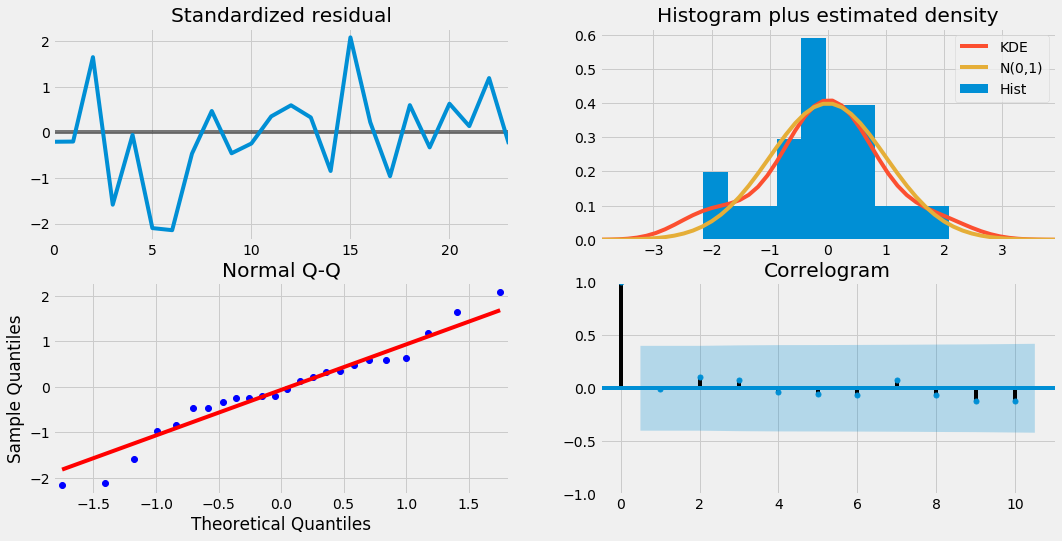

In [21]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

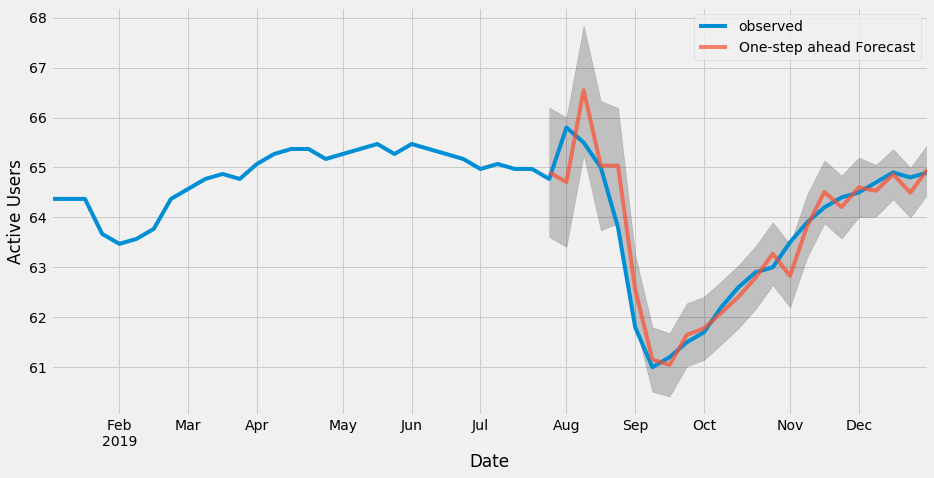

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2019-07-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Active Users')
plt.legend()
plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-07-30':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.23


In [34]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.48
